## Featureset Exploration
### Input Data fields (Features and Labels)
The input data consists of 390 samples collected from 253 doctors.
This data will be used for training and validation test in a file
named medical attached with the project proposal.
Every sample consists of 7 features and 1 label(the output target).
* **medicine:** The commercial name of the medicine that I refer to it as type1 to type6.
* **Price:** price for every drug of these 6 drugs for patient.
* **exam_price:** examination price that the doctor takes from the patient.
* **clinic_hos:** classification if this doctor has a private 'clinic' or works in a 'hospital'.
* **dr_class:** doctor class was classified according to number of patients for every doctor and how much is this doctor famous and it was classified to 'a' and 'b'.

**where:**

* **class a:** are doctors with high patient rate
* **class b:** are doctors with medium patient rate
* **area:** every medical representative cover some areas in a city where the medical representative has to make a lot of visits for alot of doctors in different places and I refer to each area with the name (area1 to area8)with total 8 areas that I have covered to make my prospection.
* **specialty:** the specialty of the doctor is one of the most important features because it will determine which of the 6 drugs will be suitable for this doctor to write it in his prescription. 

**These specialties are:**
* **Chest:** chest specialist
* **Im:** internal medicine specialist
* **Cd:** cardiology specialist
* **Neuro:** neurology specialist
* **Git:** gastrointestinal tract specialist
* **Ent:** ear, nose and throat specialist
* **Sur:** surgery specialist
* **Uro:** urology specialist
* **Gp:** general practitioner
* **Or:** orthopedic specialist
* **Vas:** vascular specialst

**With total 11 specialties.**

* **Target (label):** just one target to classify if this doctor write any of these drugs in prescription to his patients or not. With (1) if the doctor writes the drug in his prescription and (0)if not.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
data =pd.read_csv("training.txt")
data.head()

,medicine,area,speciality,price,dr_class,exam_price,clinic_hos,write
0,type1,area1,chest,45,a,200,clinic,1
1,type4,area2,im,36,b,100,clinic,1
2,type1,area8,chest,45,a,75,hospital,1
3,type1,area5,chest,45,a,30,hospital,1
4,type5,area6,uro,29,a,220,clinic,0


In [22]:
feat=data.drop('write',axis=1)
label=data['write']
feat.head()

,medicine,area,speciality,price,dr_class,exam_price,clinic_hos
0,type1,area1,chest,45,a,200,clinic
1,type4,area2,im,36,b,100,clinic
2,type1,area8,chest,45,a,75,hospital
3,type1,area5,chest,45,a,30,hospital
4,type5,area6,uro,29,a,220,clinic


In [18]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   medicine    390 non-null    object
 1   area        390 non-null    object
 2   speciality  390 non-null    object
 3   price       390 non-null    int64 
 4   dr_class    390 non-null    object
 5   exam_price  390 non-null    int64 
 6   clinic_hos  390 non-null    object
dtypes: int64(2), object(5)
memory usage: 21.5+ KB


emax_price= price 
in the count !!!!!!!!!!!!!


In [20]:
feat.describe()

,price,exam_price
count,390.000000,390.000000
mean,35.715385,121.205128
std,8.751263,86.729844
min,20.000000,30.000000
25%,29.000000,50.000000
50%,36.000000,80.000000
75%,45.000000,170.000000
max,45.000000,350.000000


### type1 is  the most sell

<AxesSubplot:xlabel='medicine', ylabel='count'>

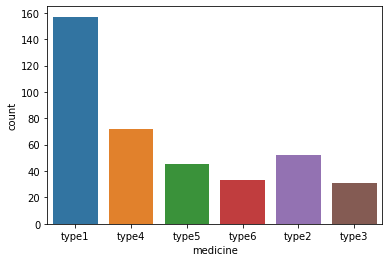

In [21]:
sb.countplot(x='medicine',data=feat)

### type1 is the most ecpensive

<AxesSubplot:xlabel='medicine', ylabel='price'>

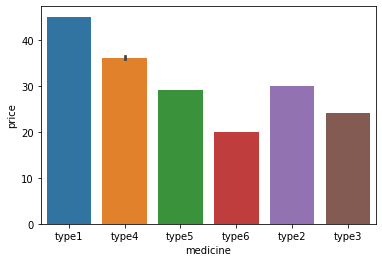

In [25]:
sb.barplot(x='medicine',y='price',data=feat)

<AxesSubplot:xlabel='medicine', ylabel='exam_price'>

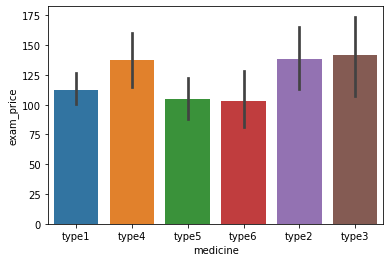

In [37]:
sb.barplot(x='medicine',y='exam_price',data=feat)

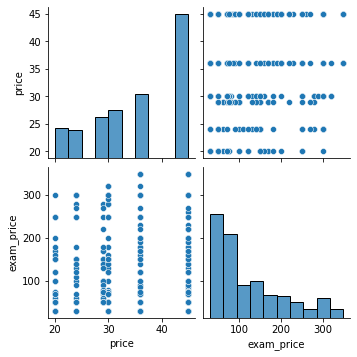

In [26]:

sb.pairplot(feat)

In [39]:
feat.corr()


,price,exam_price
price,1.000000,-0.037752
exam_price,-0.037752,1.000000


the skew of price is -0.2891203913411065


C:\Users\Fady\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


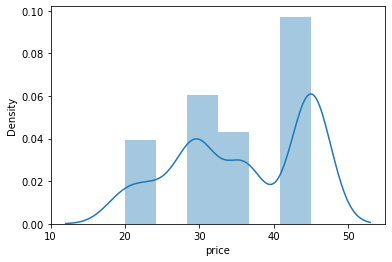

In [44]:
sb.distplot(feat['price'])
print('the skew of price is',feat['price'].skew())

the skew of price is 0.9714085516670444


C:\Users\Fady\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


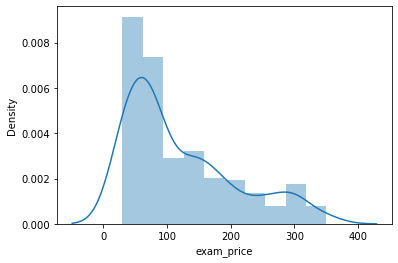

In [45]:
sb.distplot(feat['exam_price'])
print('the skew of price is',feat['exam_price'].skew())

### trans skew row by log

In [50]:
feat['exam_price']=np.log(feat['exam_price'])

In [51]:
feat['exam_price'].skew()

0.0062882200190164175

In [53]:
feat.head()

,medicine,area,speciality,price,dr_class,exam_price,clinic_hos
0,type1,area1,chest,45,a,5.298317,clinic
1,type4,area2,im,36,b,4.605170,clinic
2,type1,area8,chest,45,a,4.317488,hospital
3,type1,area5,chest,45,a,3.401197,hospital
4,type5,area6,uro,29,a,5.393628,clinic


### trans data to minmax scaler

In [60]:
scaler=MinMaxScaler()
num=['price','exam_price']
feat[num] = scaler.fit_transform(feat[num])
feat.head()

,medicine,area,speciality,price,dr_class,exam_price,clinic_hos
0,type1,area1,chest,1.00,a,0.772212,clinic
1,type4,area2,im,0.64,b,0.490070,clinic
2,type1,area8,chest,1.00,a,0.372971,hospital
3,type1,area5,chest,1.00,a,0.000000,hospital
4,type5,area6,uro,0.36,a,0.811007,clinic


In [61]:
feat_final=pd.get_dummies(feat)
feat_final.head()

,price,exam_price,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6,area_area1,area_area2,...,speciality_im,speciality_neuro,speciality_or,speciality_sur,speciality_uro,speciality_vas,dr_class_a,dr_class_b,clinic_hos_clinic,clinic_hos_hospital
0,1.00,0.772212,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.64,0.490070,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
2,1.00,0.372971,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.00,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.36,0.811007,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0


<AxesSubplot:xlabel='price'>

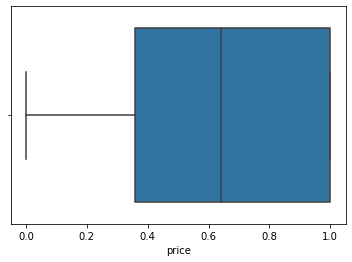

In [63]:
sb.boxplot(x=feat_final['price'])

<AxesSubplot:xlabel='exam_price'>

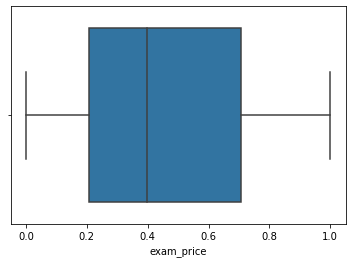

In [64]:
sb.boxplot(x=feat_final['exam_price'])

In [65]:
feat_final.head()

,price,exam_price,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6,area_area1,area_area2,...,speciality_im,speciality_neuro,speciality_or,speciality_sur,speciality_uro,speciality_vas,dr_class_a,dr_class_b,clinic_hos_clinic,clinic_hos_hospital
0,1.00,0.772212,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.64,0.490070,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
2,1.00,0.372971,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.00,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.36,0.811007,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [66]:
label.head()

0    1
1    1
2    1
3    1
4    0
Name: write, dtype: int64

In [69]:
print("Training features has {} samples.".format(feat_final.shape[0]))
print(" train label  set has {} samples.".format(label.shape[0]))

Training features has 390 samples.
 train label  set has 390 samples.


In [75]:
from sklearn.metrics import accuracy_score

## Naive model

In [85]:
listt=[]

for i in range(feat_final.shape[0]) :
    listt.append(1)
listt=pd.Series(listt)
print("the accuracy of naine is",accuracy_score(listt,label)*100)

the accuracy of naine is 58.71794871794872


## choose the best model in 3  in training only


In [157]:
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

model1=DecisionTreeClassifier()
model2=SVC()
model3=AdaBoostClassifier()

# fitting the 3 models
model1.fit(feat_final,label)
model2.fit(feat_final,label)
model3.fit(feat_final,label)

# the predection of training
feat_final_pred1=model1.predict(feat_final)
feat_final_pred2=model2.predict(feat_final)
feat_final_pred3=model3.predict(feat_final)
 
    
# the acc score
train_acc1=accuracy_score(label,feat_final_pred1)
train_acc2=accuracy_score(label,feat_final_pred2)
train_acc3=accuracy_score(label,feat_final_pred3)

print("the training score of model 1 is",train_acc1*100)
print("the training score of model 2 is",train_acc2*100)
print("the training score of model 3 is",train_acc3*100)








the training score of model 1 is 91.02564102564102
the training score of model 2 is 76.41025641025641
the training score of model 3 is 76.66666666666667


## the best model in training is the dectree  91%

# handle the testing

In [108]:
testing=pd.read_csv("testing.txt")
testing.head()

,medicine,area,speciality,price,dr_class,exam_price,clinic_hos,write
0,type1,area1,chest,45,a,220,clinic,1
1,type1,area4,im,45,b,90,hospital,1
2,type1,area2,gp,45,b,60,hospital,1
3,type1,area3,im,45,a,180,clinic,0
4,type4,area8,chest,36,a,75,hospital,0


In [109]:
outcom=testing['write']
testing=testing.drop('write',axis=1)

In [110]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   medicine    30 non-null     object
 1   area        30 non-null     object
 2   speciality  30 non-null     object
 3   price       30 non-null     int64 
 4   dr_class    30 non-null     object
 5   exam_price  30 non-null     int64 
 6   clinic_hos  30 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.8+ KB


In [111]:
testing.corr()

,price,exam_price
price,1.000000,-0.112039
exam_price,-0.112039,1.000000


In [112]:
testing.skew()

C:\Users\Fady\AppData\Local\Temp\ipykernel_13340\2515790747.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing.skew()


price         0.193453
exam_price    0.953810
dtype: float64

In [113]:
# use log trans for skew
testing['exam_price']=np.log(testing['exam_price'])

In [114]:
testing.skew()

C:\Users\Fady\AppData\Local\Temp\ipykernel_13340\2515790747.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing.skew()


price         0.193453
exam_price   -0.260494
dtype: float64

In [115]:
scaler=MinMaxScaler()
num1=['price','exam_price']
testing[num1] = scaler.fit_transform(testing[num1])
testing.head()

,medicine,area,speciality,price,dr_class,exam_price,clinic_hos
0,type1,area1,chest,1.00,a,0.811007,clinic
1,type1,area4,im,1.00,b,0.447184,hospital
2,type1,area2,gp,1.00,b,0.282142,hospital
3,type1,area3,im,1.00,a,0.729325,clinic
4,type4,area8,chest,0.64,a,0.372971,hospital


In [116]:
testing=pd.get_dummies(testing)
testing.head()

,price,exam_price,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6,area_area1,area_area2,...,speciality_im,speciality_neuro,speciality_or,speciality_sur,speciality_uro,speciality_vas,dr_class_a,dr_class_b,clinic_hos_clinic,clinic_hos_hospital
0,1.00,0.811007,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,1.00,0.447184,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,1.00,0.282142,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,1.00,0.729325,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0.64,0.372971,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [117]:
outcom.head()

0    1
1    1
2    1
3    0
4    0
Name: write, dtype: int64

In [118]:
print("test features has {} samples.".format(testing.shape[0]))
print(" test label  set has {} samples.".format(outcom.shape[0]))

test features has 30 samples.
 test label  set has 30 samples.


# Naive model for testing

In [120]:
listtt=[]

for i in range(testing.shape[0]) :
    listtt.append(1)
listt=pd.Series(listt)
print("the accuracy of naive testing is",accuracy_score(listtt,outcom)*100)

the accuracy of naive testing is 60.0


# detrmine the best model in testing

In [127]:
# testing , outcom
from sklearn.metrics import fbeta_score



test_pred1=model1.predict(testing)
test_pred2=model2.predict(testing)
test_pred3=model3.predict(testing)

test_acc1=accuracy_score(outcom,test_pred1)
test_acc2=accuracy_score(outcom,test_pred2)
test_acc3=accuracy_score(outcom,test_pred3)


print("testing accuracy for model 1:",round(test_acc1*100),"%")
print("testing accuracy for model 2:",round(test_acc2*100),"%")
print("testing accuracy for model 3:",round(test_acc3*100),"%")




print('fbeta score for dectree is ',fbeta_score(outcom,test_pred1,beta=0.5)*100 ,'%')


testing accuracy for model 1: 83 %
testing accuracy for model 2: 73 %
testing accuracy for model 3: 73 %
fbeta score for dectree is  85.1063829787234 %


In [144]:
DecisionTreeClassifier()

DecisionTreeClassifier()

# the best model in dectree in train 91 and in testing 83

# x_train,x_test.y_train,_y_test=feat_final,testing,label,outcom

In [159]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

#parameters={'max_depth':[1,2,3,4,5],'min_samples_leaf':[1,2,4,6,7],'min_samples_split':[2,5,6,8]}
parameters = {'max_depth': [4,5,6], 'min_samples_leaf': [0.001,0.0001,0.01,0.1], 'min_samples_split': [0.1,0.01,0.001,0.00001]}


scorer = make_scorer(fbeta_score, beta = 0.5)

grid_obj = GridSearchCV(clf, parameters,scoring=scorer)

grid_fit =grid_obj.fit(feat_final,label )

best_clf = grid_fit.best_estimator_

best_clf.fit(feat_final, label)

best_train_predictions = best_clf.predict(feat_final)
best_test_predictions = best_clf.predict(testing)




train_accuracy = accuracy_score(label, best_train_predictions)
test_accuracy = accuracy_score(outcom,best_test_predictions )
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)






The training accuracy is 0.7846153846153846
The test accuracy is 0.7333333333333333


In [160]:
best_clf

DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.001,
                       min_samples_split=0.01, random_state=42)